In [95]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [99]:
import numpy as np
from numpy.linalg import matrix_rank
import scipy 
import scipy.integrate

import random 

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

from sympy import integrate
import sympy as sp

In [39]:
X = np.loadtxt('9_x.csv', delimiter=',')
y = np.loadtxt('9_y.csv').reshape(-1, 1)

In [40]:
def input4():
    #данные считываются отдельно
    r = input('1-линейная,2-полином,3-экспонента  ')
    a=input('количество столбцов в  первом наборе данных  ')
    b=input('количество столбцов во втором наборе данных  ')
    

  

 
    Final = {'r': r,
            'a':a,
            'b':b}
    return Final

In [101]:
def func_exp(x, a, b, c):
        #c = 0
        return a * np.exp(b * x) + c

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.01, 1))
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

In [102]:
def regression(data):
    
   
    r = int(data['r'])
    a = int(data['a'])
    b = int(data['b'])
   
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if r==1:
        
        for i in range(a):
            print(f"column: {i}")
            curr_column = X[:, i]
            curr_column_train = X_train[:, i].reshape(-1, 1)
            model = LinearRegression().fit(curr_column_train, y_train)
            print(f"correlation: {np.corrcoef(curr_column, y.flatten())[0][1]}")
            linsp = np.linspace(curr_column.min(), curr_column.max(), 1000).reshape(-1, 1)
            predicted = model.predict(linsp)
            
            plt.figure()
            plt.scatter(curr_column, y)
            plt.plot(linsp, predicted, 'r')
        
#         reg = linear_model.LinearRegression()
#         reg.fit(X1, Y1)
#         predicted = reg.predict(X1)
       
 
        
    elif r==2:
        
        
        N=input('введите степень полинома ')
        t=int(N)
        n = X.shape[1]
        fig, axs = plt.subplots(n, 3)
        plt.rcParams["figure.figsize"] = (20, 20)
        
        for i in range(a):
            curr_column = X[:, i]
            curr_column_train = X_train[:, i].reshape(-1, 1)
            curr_column_test = X_test[:, i].reshape(-1, 1)

            linsp = np.linspace(curr_column.min(), curr_column.max(), 1000).reshape(-1, 1)
           
            
            poly = PolynomialFeatures(degree=t)
            X_poly_train = poly.fit_transform(curr_column_train)
            X_poly_test = poly.fit_transform(curr_column_test)


            model = LinearRegression().fit(X_poly_train, y_train)
            predicted = model.predict(poly.fit_transform(linsp))
            
            print(f"R^2: {i}",model.score(X_poly_test,y_test))
            j=1
            axs[i, j].scatter(curr_column, y)
            axs[i, j].plot(linsp, predicted, 'r')
            
  


           
       
    elif r==3:
        exponential_regression(X_train, y_train)
      
        
            
    
        


1-линейная,2-полином,3-экспонента  1
количество столбцов в  первом наборе данных  5
количество столбцов во втором наборе данных  1
column: 0
correlation: 0.3993648847462371
column: 1
correlation: 0.25238655832912843
column: 2
correlation: 0.6707184524989981
column: 3
correlation: 0.6832492322333796
column: 4
correlation: -0.025663560277040066


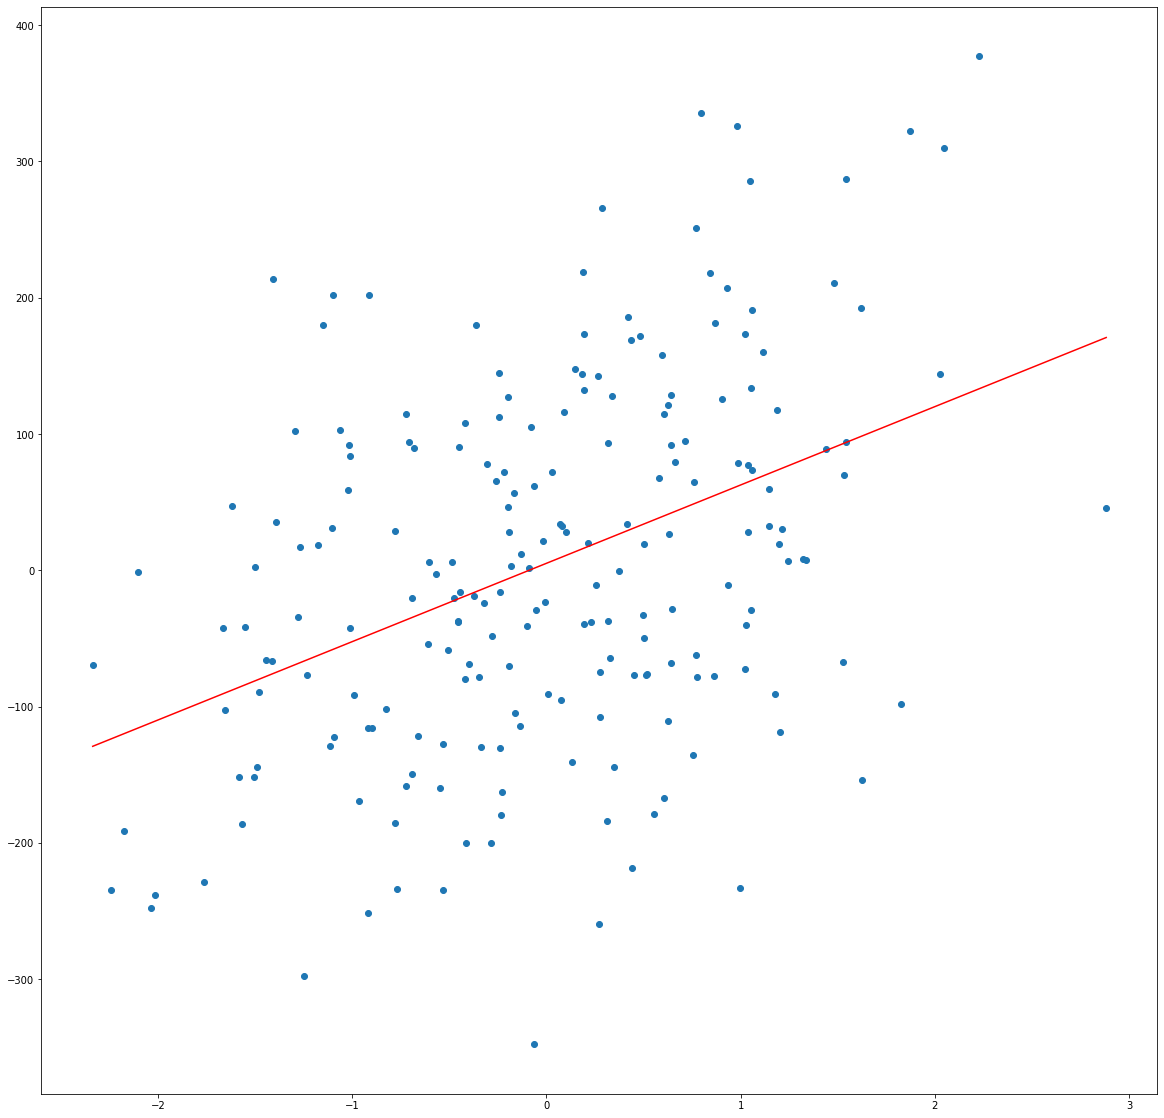

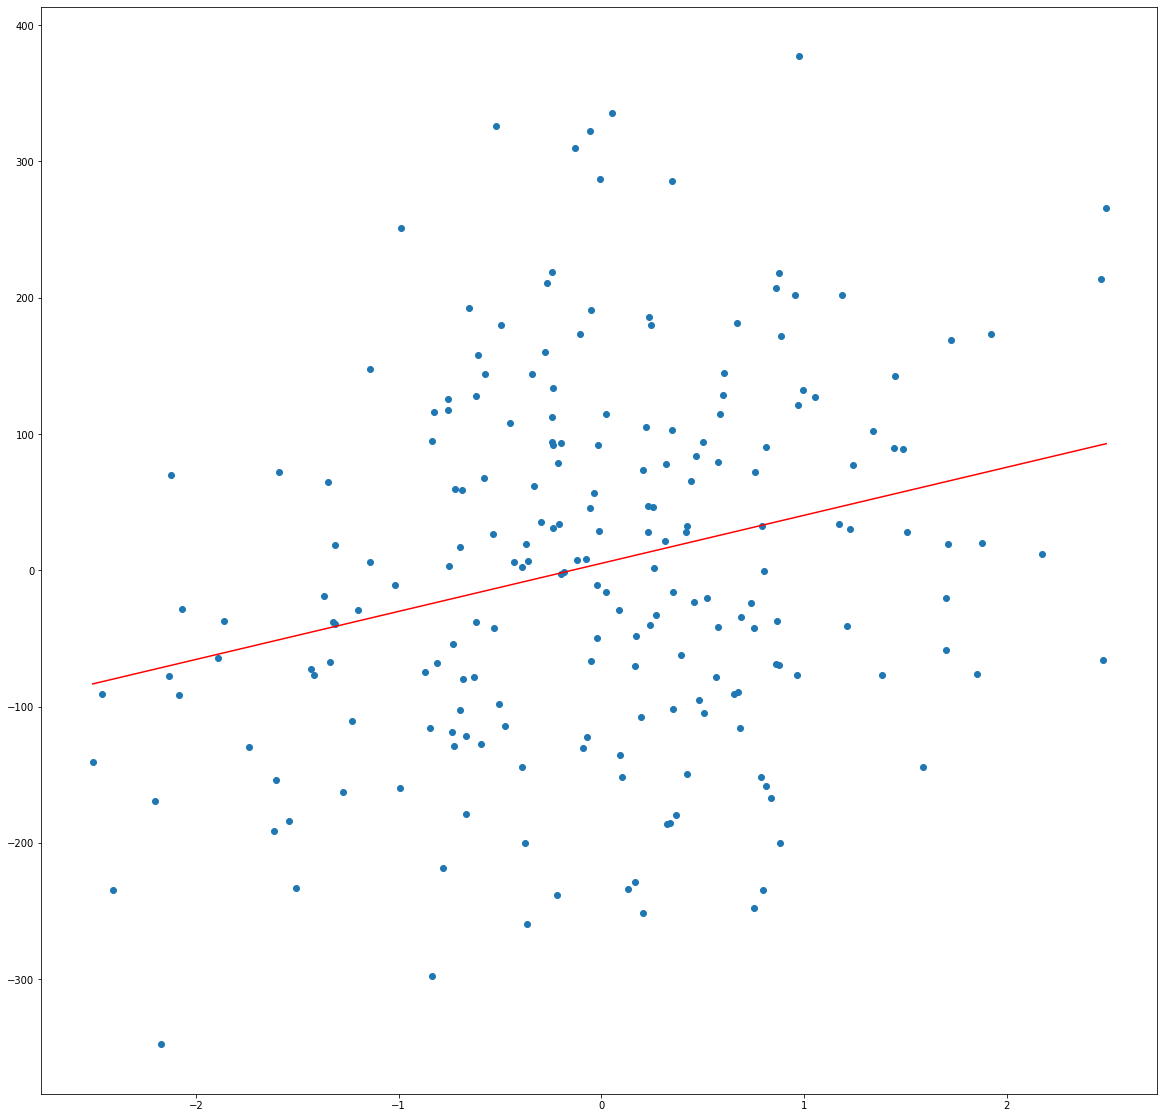

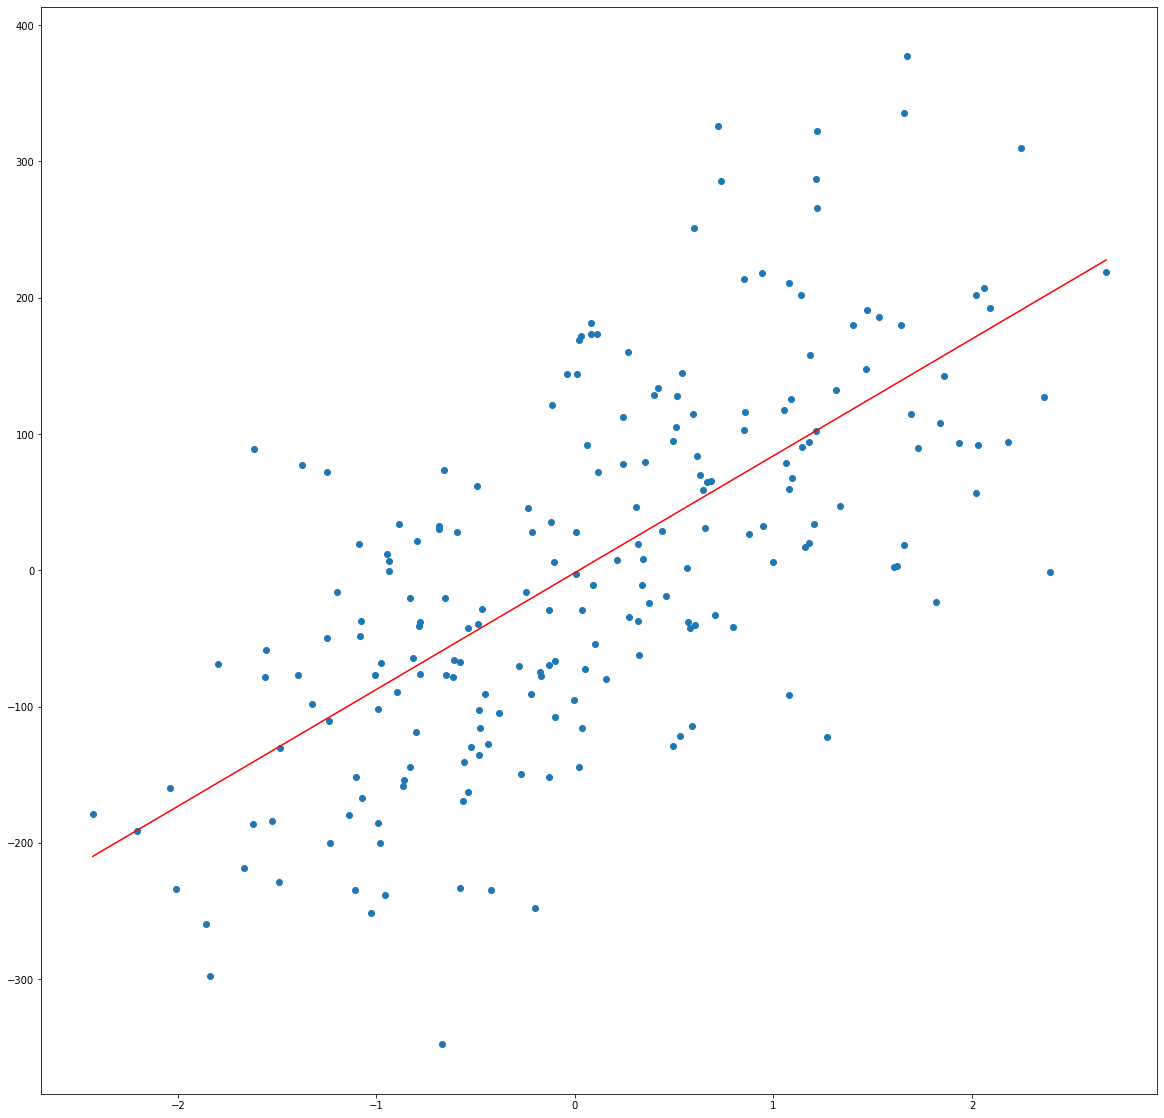

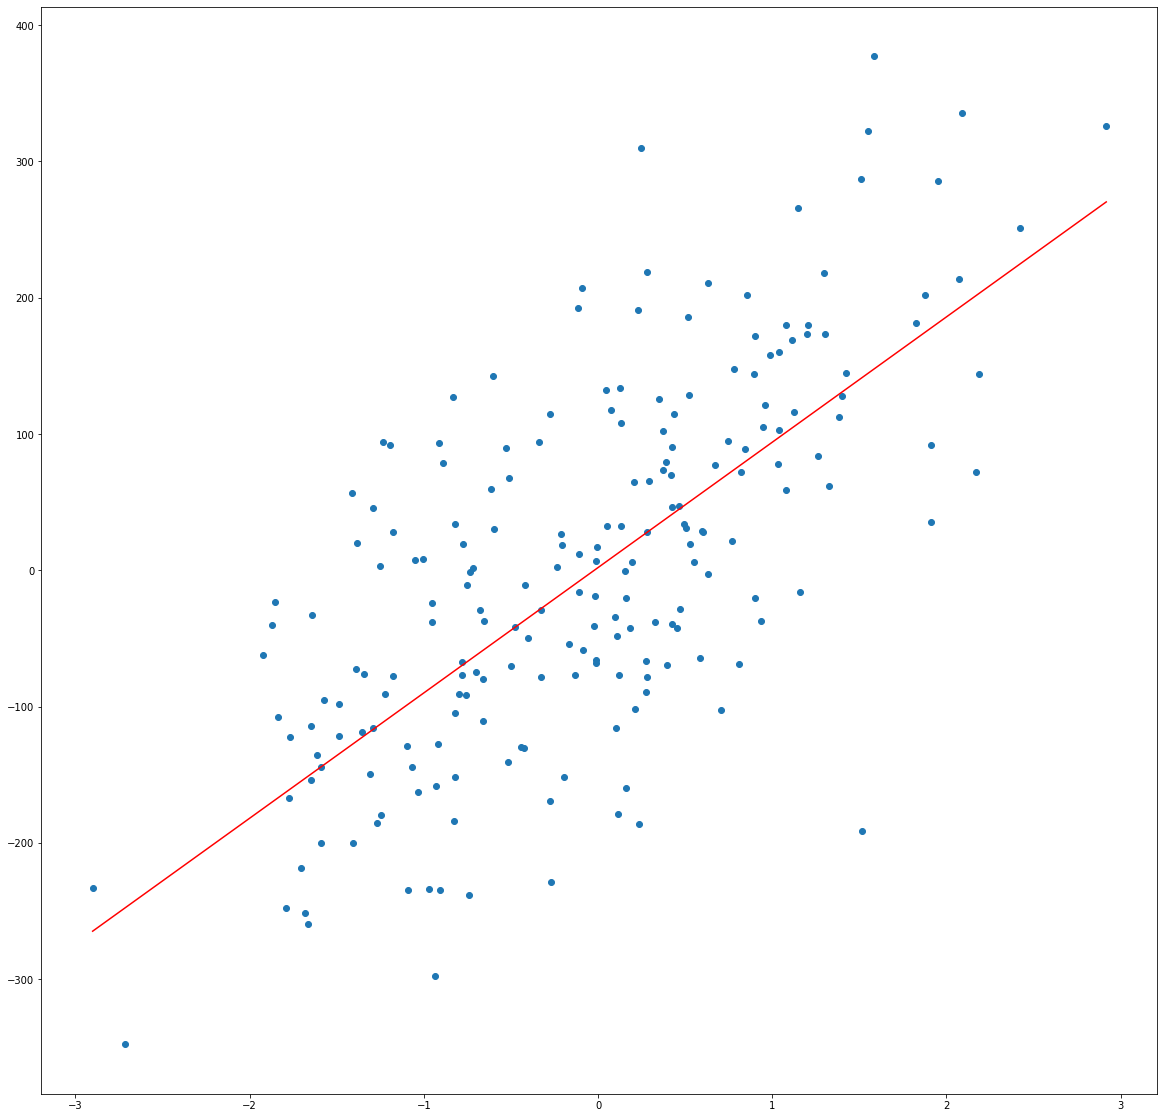

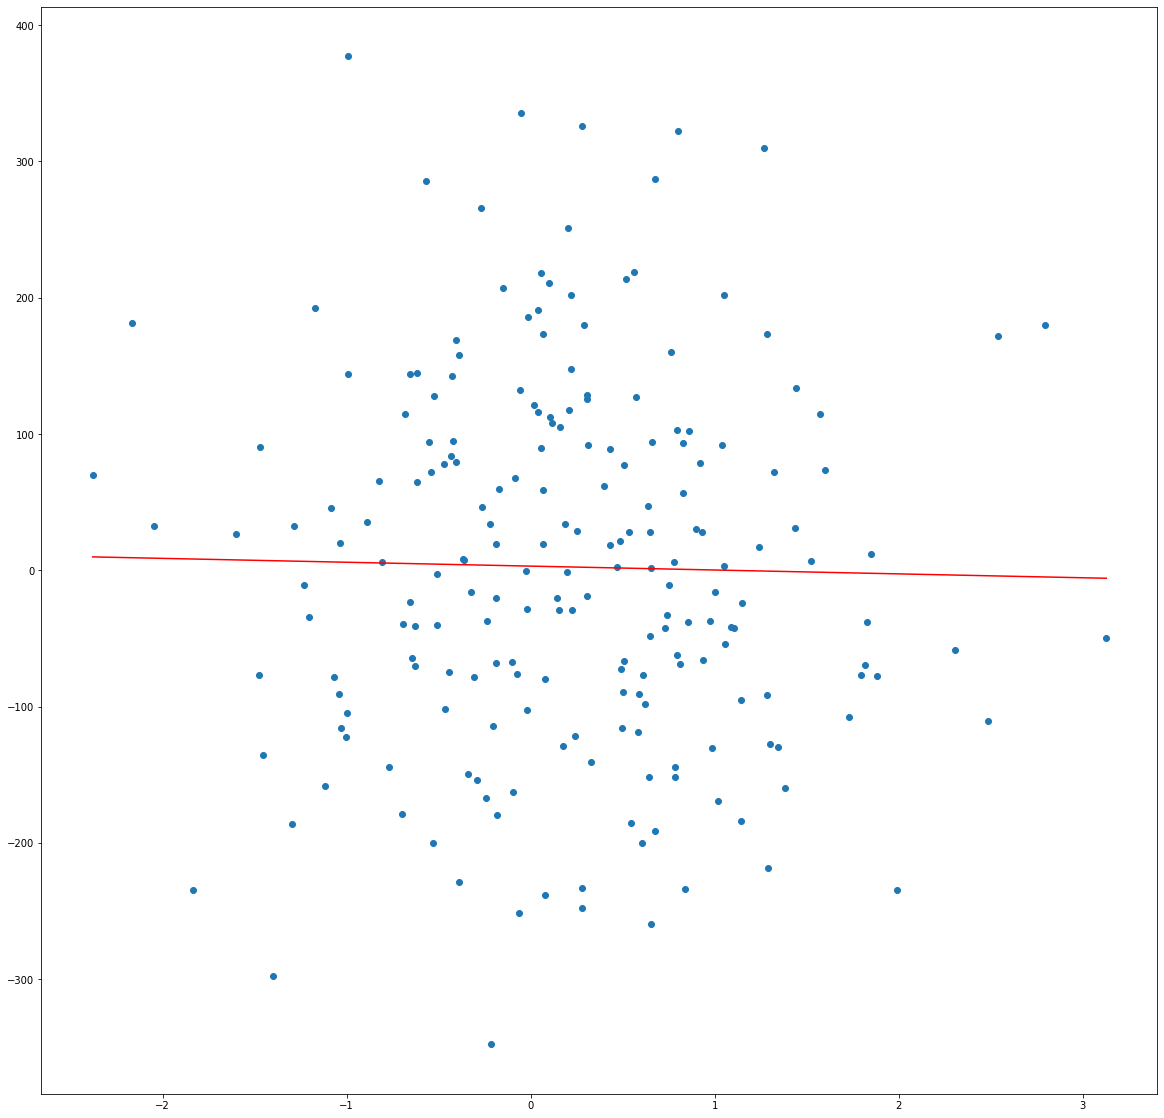

In [104]:
regression(input4()) # линейный

1-линейная,2-полином,3-экспонента  2
количество столбцов в  первом наборе данных  5
количество столбцов во втором наборе данных  1
введите степень полинома 2
R^2: 0 0.14871324363200833
R^2: 1 0.06689499536386756
R^2: 2 0.3671293178552337
R^2: 3 0.30591186655154123
R^2: 4 -0.03348301481699445


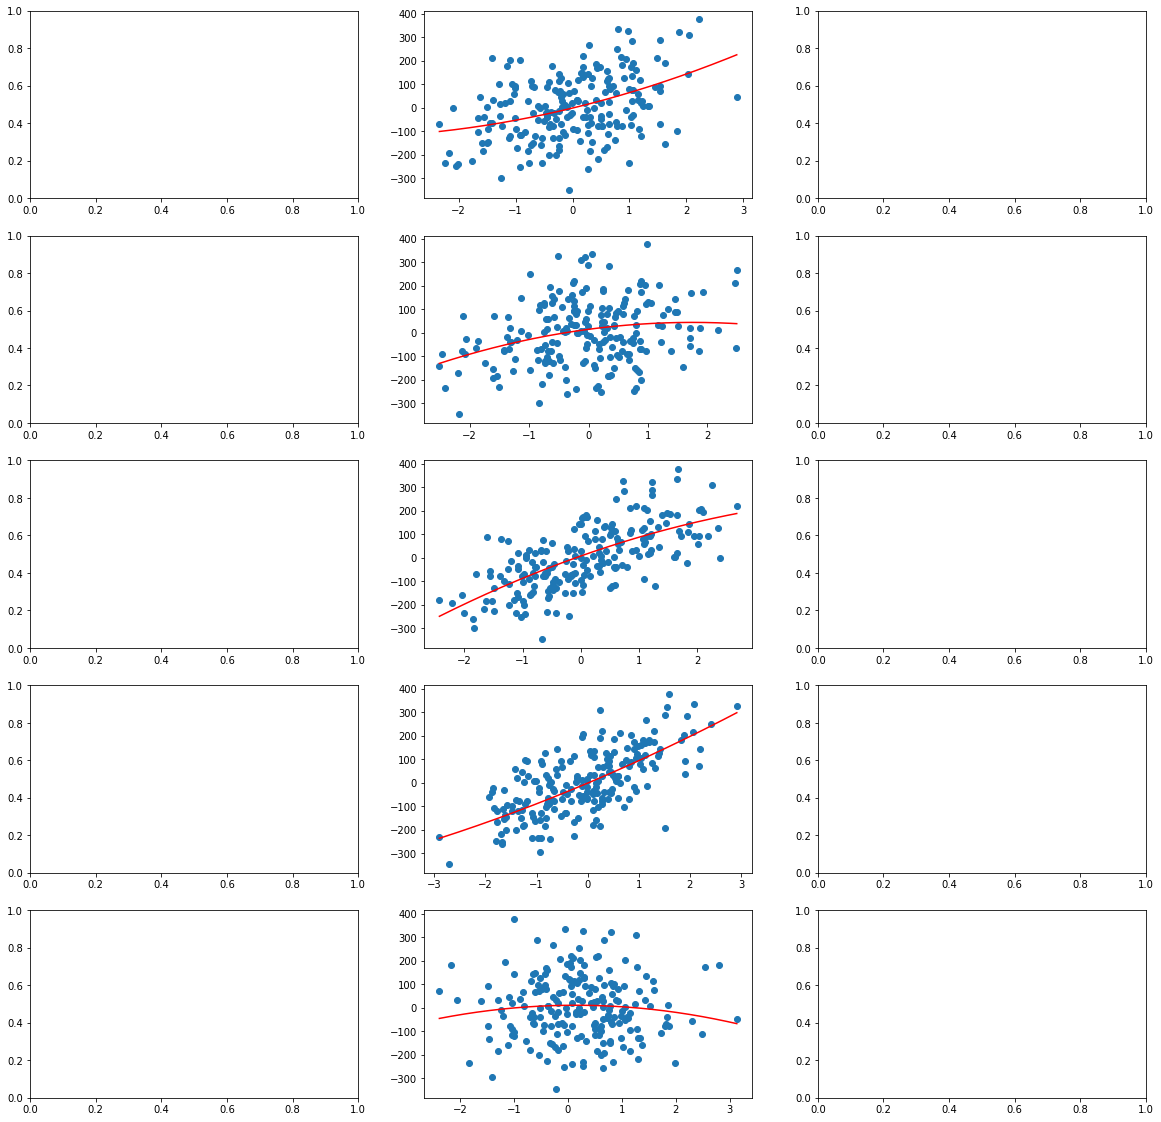

In [105]:
regression(input4()) # полином